<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/stock_profitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# loading dataset
data = sns.load_dataset("mpg")

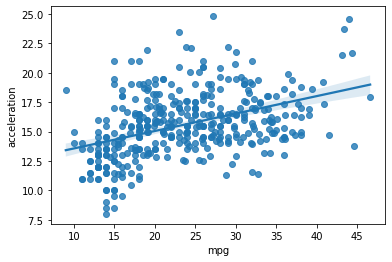

In [4]:
# draw regplot
sns.regplot(x = "mpg", 
            y = "acceleration", 
            data = data)
plt.show()

Постройте линии регрессии, с помощью функции regplot, зависимости доходности одной акции от другой. Всего три графика. Выберите пару акций которые наименее зависимы в доходностях от друг друга.

In [5]:
import requests

base_site='https://goit.global/textbooks/python/data-science-xf8b2g/v1/docs/module-03/hw/'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest",
}
r = requests.get(base_site, headers=header)
# r.status_code
# r.text
r.encoding = 'utf-8'
df = pd.read_html(r.text)[0]
df

,Момент наблюдения,"Доходность A, %","Доходность B, %","Доходность C, %"
0,1,25,0,10
1,2,-10,15,25
2,3,10,-5,-15
3,4,5,5,-5
4,5,35,20,-5
5,6,13,25,15


In [6]:
df.columns

Index(['Момент наблюдения', 'Доходность A, %', 'Доходность B, %',
       'Доходность C, %'],
      dtype='object')

In [7]:
# df.columns = ['moment', 'profit_a', 'profit_b', 'profit_c']
df

,Момент наблюдения,"Доходность A, %","Доходность B, %","Доходность C, %"
0,1,25,0,10
1,2,-10,15,25
2,3,10,-5,-15
3,4,5,5,-5
4,5,35,20,-5
5,6,13,25,15


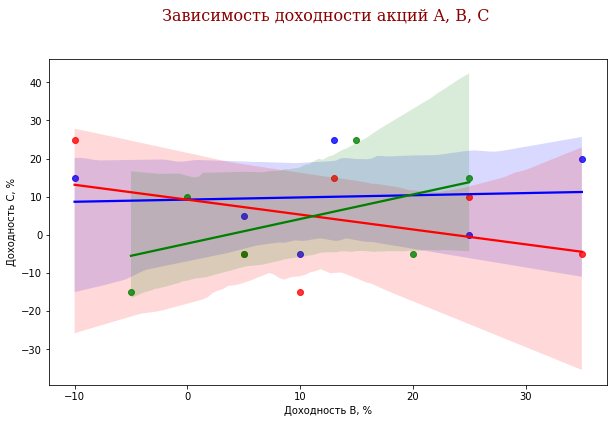

In [8]:
plt.figure(figsize=(10,6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

sns.regplot(x="Доходность A, %", y="Доходность B, %", color='blue', data=df);
sns.regplot(x="Доходность A, %", y="Доходность C, %", color='red', data=df);
sns.regplot(x="Доходность B, %", y="Доходность C, %", color='green', data=df);
plt.title("Зависимость доходности акций A, B, C ", fontdict=font, x=0.5, y=1.1)
plt.show;

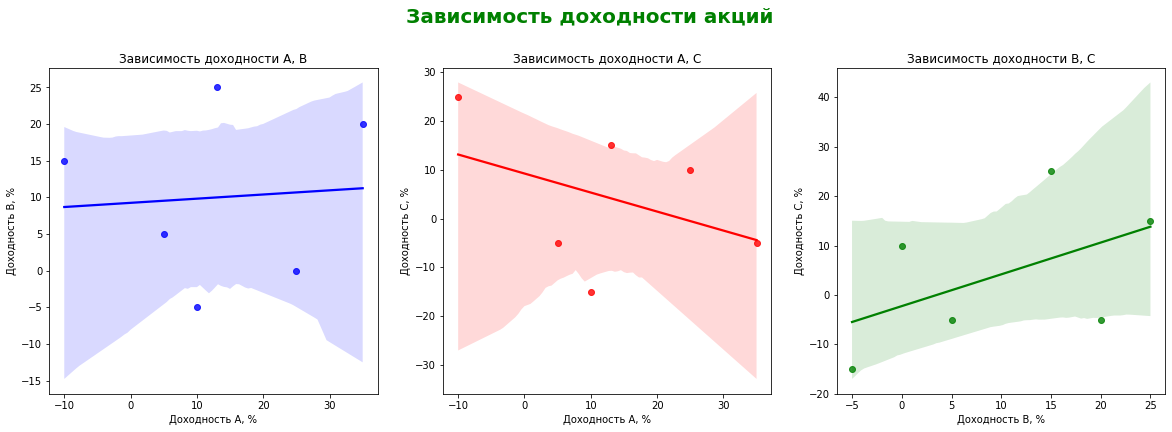

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Зависимость доходности акций', fontsize=20, color='green', weight='bold', y=1.02)

sns.regplot(x="Доходность A, %", y="Доходность B, %", color='blue', data=df, ax=axes[0]).set(title='Зависимость доходности A, B');
sns.regplot(x="Доходность A, %", y="Доходность C, %", color='red', data=df, ax=axes[1]).set(title='Зависимость доходности A, C');
sns.regplot(x="Доходность B, %", y="Доходность C, %", color='green', data=df, ax=axes[2]).set(title='Зависимость доходности B, C');
plt.show()


In [10]:
df[['Доходность A, %', 'Доходность B, %','Доходность C, %']].corr()

,"Доходность A, %","Доходность B, %","Доходность C, %"
"Доходность A, %",1.000000,0.075439,-0.408807
"Доходность B, %",0.075439,1.000000,0.508034
"Доходность C, %",-0.408807,0.508034,1.000000


Text(0.5, 1.05, 'Correlation matrix')

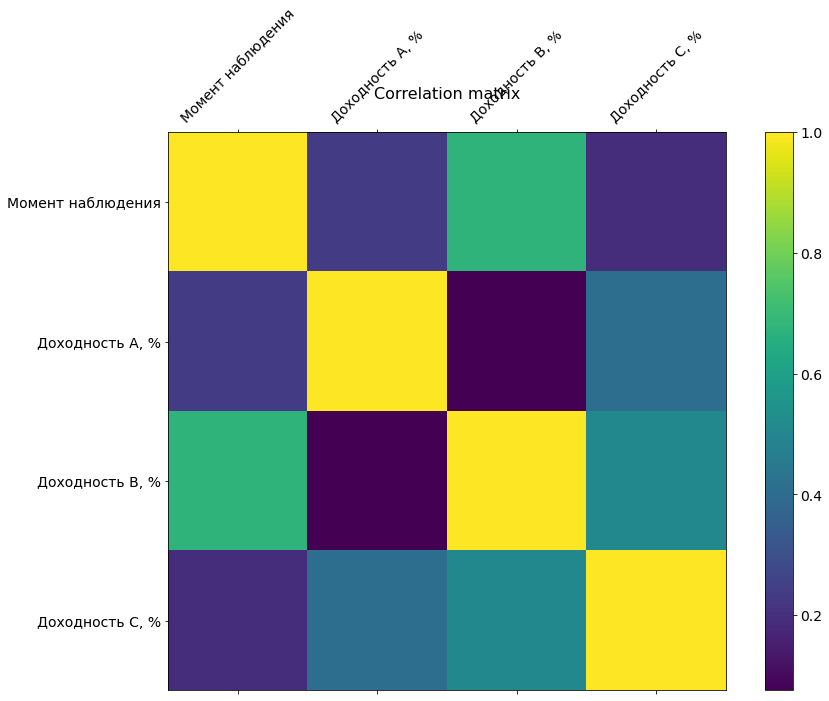

In [16]:
f = plt.figure(figsize=(14,10))
plt.matshow(df.corr().abs(),fignum=f.number)
# plt.matshow(df[['Доходность A, %', 'Доходность B, %','Доходность C, %']].corr().abs(),fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation matrix', fontsize=16)